# Academic Collaboration Network Analysis Project Summary

## Introduction:

Welcome to the Academic Collaboration Network Analysis project! This comprehensive endeavor aims to leverage Scopus data to uncover patterns and insights within academic collaboration networks. The project explores the relationships between researchers, institutions, and interdisciplinary research trends. Follow the structured steps outlined in this Jupyter Notebook to gain valuable insights into the dynamics of academic collaboration.

## Project Objectives:

The primary objectives of this project are:

- **Understand Collaboration Patterns:** Analyze and understand collaboration patterns between researchers and institutions.
- **Identify Influential Entities:** Identify key researchers, institutions, and research areas driving academic collaboration.
- **Explore Interdisciplinary Trends:** Investigate interdisciplinary collaboration trends based on shared keywords.


## Import the necessary libraries


In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

## Load and preprocess data

In [3]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('scopus.csv').dropna()

In [4]:
df.head()

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Cited by,DOI,Link,Affiliations,Authors with affiliations,Abstract,Author Keywords,Index Keywords,Language of Original Document,Document Type,Source,EID
0,Arazzi M.; Murer D.; Nicolazzo S.; Nocera A.,"Arazzi, Marco (58167029600); Murer, Daniele (5...",58167029600; 58650423800; 55909074400; 3511375...,How COVID-19 affects user interaction with onl...,2023,Social Network Analysis and Mining,0,10.1007/s13278-023-01143-3,https://www.scopus.com/inward/record.uri?eid=2...,"Department of Electrical, Computer and Biomedi...","Arazzi M., Department of Electrical, Computer ...","The worldwide diffusion of COVID-19, declared ...",COVID-19; Natural language processing; Sentime...,Internet service providers; Large dataset; Sen...,English,Article,Scopus,2-s2.0-85174228706
4,Ghienne M.; Limare A.,"Ghienne, Martin (57191838086); Limare, Alexand...",57191838086; 57190494628,Learning structural stress virtual sensors fro...,2023,Computers and Structures,0,10.1016/j.compstruc.2023.107155,https://www.scopus.com/inward/record.uri?eid=2...,Institut supérieur de mécanique de Paris (ISAE...,"Ghienne M., Institut supérieur de mécanique de...",This work aims to predict the mechanical stres...,Aircraft Digital Twin; Challenge AI for indust...,E-learning; Learning systems; Stresses; Time s...,English,Article,Scopus,2-s2.0-85171785384
8,Ortiz R.H.; Cabrera L.A.; Samaniego M.A.,"Ortiz, Remigio Hurtado (57221011081); Cabrera,...",57221011081; 58659740400; 58660443700,A New Method and Case Study for Predicting Tut...,2024,Lecture Notes in Networks and Systems,0,10.1007/978-981-99-3043-2_23,https://www.scopus.com/inward/record.uri?eid=2...,"Universidad Politécnica Salesiana, Calle Vieja...","Ortiz R.H., Universidad Politécnica Salesiana,...",What has become evident over time in higher ed...,Academic tutoring; Data analysis; Machine lear...,Learning systems; Quality control; Support vec...,English,Conference paper,Scopus,2-s2.0-85174674624
9,Chen Z.; Zhao X.; He R.; Li H.; Fu S.; Zhang K...,"Chen, Zhen (58544479600); Zhao, Xu (5854464910...",58544479600; 58544649100; 57223921465; 5719635...,The impact of insurance status on in-hospital ...,2023,Journal of Evaluation in Clinical Practice,0,10.1111/jep.13921,https://www.scopus.com/inward/record.uri?eid=2...,"Department of Emergency, The First Affiliated ...","Chen Z., Department of Emergency, The First Af...",Aim: This study was designed to determine the ...,diabetes; hyperglycaemic crisis; insurance; mo...,Hospital Mortality; Humans; Hyperglycemia; Ins...,English,Article,Scopus,2-s2.0-85168524602
10,Zhong Y.; Xie Z.; Li W.; Luo X.,"Zhong, Yurong (57218481694); Xie, Zhe (5784618...",57218481694; 57846188300; 57192673478; 5846163...,A Dynamic Linear Bias Incorporation Scheme for...,2024,Lecture Notes in Computer Science (including s...,0,10.1007/978-981-99-7019-3_5,https://www.scopus.com/inward/record.uri?eid=2...,"School of Computer Science and Technology, Don...","Zhong Y., School of Computer Science and Techn...",High-Dimensional and Incomplete (HDI) data is ...,Knowledge Discovery from High-Dimensional and ...,Data mining; Factor analysis; Learning systems...,English,Conference paper,Scopus,2-s2.0-85177175139


In [5]:
df.shape

(1194, 18)

## Academic Affiliation Country Collaboration Network Generation

Extract country information from these affiliations, and then generate a network of country collaborations based on co-occurrences in academic affiliations. The resulting collaboration network is represented as nodes and edges, with the edges weighted by the frequency of collaboration between pairs of countries. Finally, the node and edge data are saved as CSV files for further analysis and visualization.

In [6]:
# Create an empty dictionary to store country collaborations
collaborations = {}

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    # Check if the "Affiliations" value is a string
    if isinstance(row['Affiliations'], str):
        # Extract affiliations from the "Affiliations" column
        affiliations = row['Affiliations'].split('; ')
        
        # Extract countries from each affiliation
        countries = [affiliation.split(', ')[-1] for affiliation in affiliations]
        
        # Generate unique combinations of country pairs
        country_pairs = [(country1, country2) for i, country1 in enumerate(countries) for j, country2 in enumerate(countries) if i < j]
        
        # Update collaborations dictionary with the country pairs
        for pair in country_pairs:
            if pair in collaborations:
                collaborations[pair] += 1
            else:
                collaborations[pair] = 1

# Create a DataFrame for nodes
nodes_df = pd.DataFrame(list(set([country for pair in collaborations.keys() for country in pair])), columns=['Country'])

# Create a DataFrame for edges with "Source" and "Target" columns
edges_df = pd.DataFrame(list(collaborations.keys()), columns=['Source', 'Target'])

# Add a "Weight" column to represent the collaboration strength
edges_df['Weight'] = [collaborations[pair] for pair in collaborations]

edges_df.to_csv('./edges/country_edges.csv', index=False)
nodes_df.to_csv('./nodes/country_nodes.csv', index=False)



## Centrality Analysis of Academic Affiliation Country Collaboration Network

Take the previously generated country collaboration network, represented as a directed graph, and calculate various centrality metrics, including degree centrality, betweenness centrality, closeness centrality, eigenvector centrality, and PageRank. The results are stored in a DataFrame, and the top five countries for each centrality measure are identified and printed for further analysis.

In [7]:
# Create a directed graph from the edge DataFrame
G = nx.from_pandas_edgelist(edges_df, 'Source', 'Target', ['Weight'], create_using=nx.DiGraph())

# Network Metrics
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)
pagerank = nx.pagerank(G)

# Create a DataFrame to store the metrics
nodes_data = {
    'Country': list(G.nodes),
    'Degree Centrality': [degree_centrality[Country] for Country in G.nodes],
    'Betweenness Centrality': [betweenness_centrality[Country] for Country in G.nodes],
    'Closeness Centrality': [closeness_centrality[Country] for Country in G.nodes],
    'Eigenvector Centrality': [eigenvector_centrality[Country] for Country in G.nodes],
    'PageRank': [pagerank[Country] for Country in G.nodes],
}

nodes_df = pd.DataFrame(nodes_data)

# Get top ten Countries for each centrality measure
# Identify top countries based on different centrality measures
top_degree_countries = nodes_df.nlargest(5, 'Degree Centrality')['Country'].tolist()
top_betweenness_countries = nodes_df.nlargest(5, 'Betweenness Centrality')['Country'].tolist()
top_closeness_countries = nodes_df.nlargest(5, 'Closeness Centrality')['Country'].tolist()

print("Top countries based on Degree Centrality:", top_degree_countries)
print("Top countries based on Betweenness Centrality:", top_betweenness_countries)
print("Top countries based on Closeness Centrality:", top_closeness_countries)


Top countries based on Degree Centrality: ['United States', 'United Kingdom', 'France', 'China', 'Spain']
Top countries based on Betweenness Centrality: ['United States', 'United Kingdom', 'India', 'China', 'France']
Top countries based on Closeness Centrality: ['United States', 'United Kingdom', 'Spain', 'Germany', 'China']


The output provides the top countries based on different centrality measures in the academic affiliation country collaboration network.

**Degree Centrality:**

The countries listed, including the United States, United Kingdom, France, China, and Spain, have the highest degree centrality. This indicates that these countries have a high number of academic collaborations with other countries, making them central in the network.

**Betweenness Centrality:**

The countries listed, such as the United States, United Kingdom, India, China, and France, exhibit high betweenness centrality. This implies that these countries act as crucial bridges or intermediaries in connecting other countries within the collaboration network.

**Closeness Centrality:**

The top countries, including the United States, United Kingdom, Spain, Germany, and China, have high closeness centrality. This suggests that these countries are closely connected to other countries in the network, facilitating efficient information flow and collaboration pathways.

In summary, these centrality measures provide insights into different aspects of the collaboration network, highlighting countries that are influential due to their high number of connections (Degree Centrality), act as key intermediaries (Betweenness Centrality), and are closely connected to others (Closeness Centrality).ff

In [8]:
# Sort the DataFrame by 'Degree Centrality' in descending order
sorted_df = nodes_df.sort_values(by='Degree Centrality', ascending=False)

sorted_df.head()

,Country,Degree Centrality,Betweenness Centrality,Closeness Centrality,Eigenvector Centrality,PageRank
1,United States,1.105769,0.246927,0.633861,0.354839,0.072947
5,United Kingdom,0.701923,0.077568,0.486119,0.260591,0.033963
7,France,0.596154,0.051956,0.425354,0.217878,0.017985
6,China,0.567308,0.053880,0.442835,0.183101,0.026024
11,Spain,0.509615,0.030430,0.445889,0.235286,0.023907


## Distribution Analysis of Centrality Measures in Academic Collaboration Network:

Generate histograms for various centrality measures (Degree Centrality, Betweenness Centrality, Closeness Centrality, Eigenvector Centrality, and PageRank) in the academic affiliation country collaboration network. The histograms provide visual insights into the distribution of centrality values, helping to understand the prominence and variability of these measures across different countries in the collaboration network

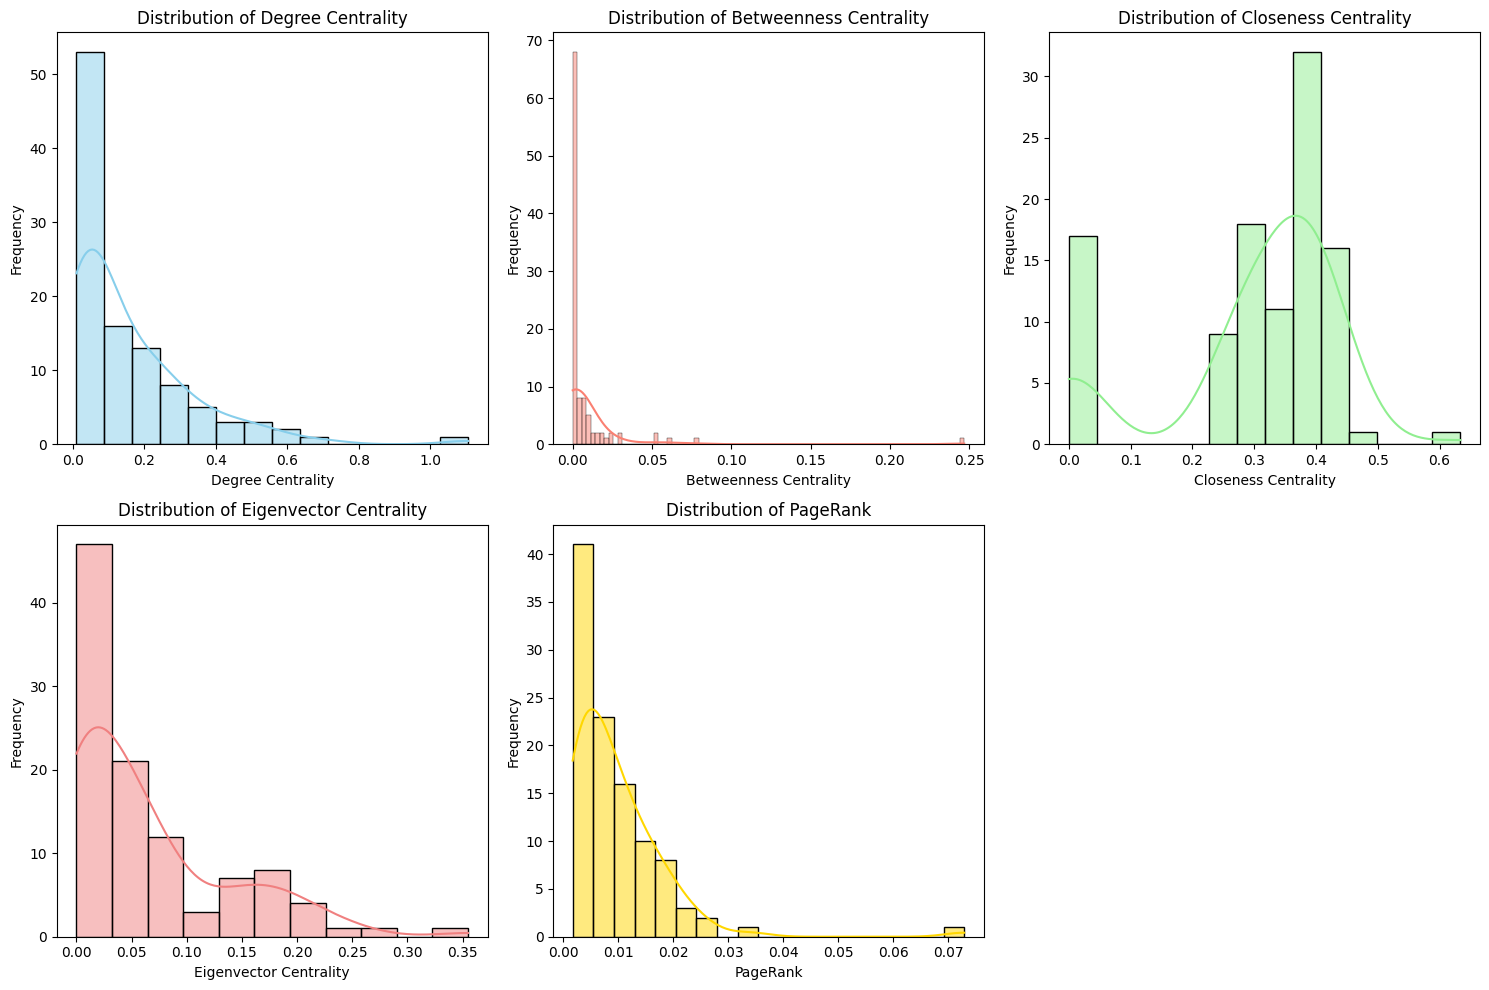

In [9]:
# Histograms for Centrality Measures
plt.figure(figsize=(15, 10))

# Degree Centrality
plt.subplot(2, 3, 1)
sns.histplot(nodes_df['Degree Centrality'], kde=True, color='skyblue')
plt.title('Distribution of Degree Centrality')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')

# Betweenness Centrality
plt.subplot(2, 3, 2)
sns.histplot(nodes_df['Betweenness Centrality'], kde=True, color='salmon')
plt.title('Distribution of Betweenness Centrality')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')

# Closeness Centrality
plt.subplot(2, 3, 3)
sns.histplot(nodes_df['Closeness Centrality'], kde=True, color='lightgreen')
plt.title('Distribution of Closeness Centrality')
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')

# Eigenvector Centrality
plt.subplot(2, 3, 4)
sns.histplot(nodes_df['Eigenvector Centrality'], kde=True, color='lightcoral')
plt.title('Distribution of Eigenvector Centrality')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')

# PageRank
plt.subplot(2, 3, 5)
sns.histplot(nodes_df['PageRank'], kde=True, color='gold')
plt.title('Distribution of PageRank')
plt.xlabel('PageRank')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### 1. Degree Centrality:
Histogram Shape: The Degree Centrality histogram shows a distribution with a peak around 0 and then gradually decreasing frequencies as centrality values increase.

Interpretation: The majority of countries have a relatively low number of collaborations, indicating that many countries have a limited number of connections in the collaboration network. A few countries may have a higher number of collaborations, potentially acting as hubs.

### 2. Betweenness Centrality:
Histogram Shape: The Betweenness Centrality histogram has a right-skewed distribution, with most countries having lower betweenness centrality and a few with higher values.

Interpretation: Most countries have low betweenness centrality, suggesting that they are not frequently on the shortest paths between other countries. However, a few countries play a crucial role as intermediaries or connectors between different regions of the collaboration network.

### 3. Closeness Centrality:
Histogram Shape: The Closeness Centrality histogram displays a distribution where most countries have higher centrality values, indicating they are relatively close to other countries in terms of collaboration.

Interpretation: The network is characterized by efficient communication, with the majority of countries having high closeness centrality. This suggests that information can flow quickly through the network, facilitating collaborations.

### 4. Eigenvector Centrality:
Histogram Shape: The Eigenvector Centrality histogram shows a distribution with a peak around 0.01 and a gradual decrease in frequencies as centrality values increase.

Interpretation: Many countries have relatively low eigenvector centrality, indicating that they are not strongly connected to other countries with high centrality. A few countries, however, may have higher eigenvector centrality, potentially influencing other well-connected countries.

### 5. PageRank:
Histogram Shape: The PageRank histogram displays a distribution with a peak around 0, and frequencies decrease as PageRank values increase.

Interpretation: The majority of countries have relatively low PageRank values, suggesting that they are not frequently referenced by other important countries. However, a few countries with higher PageRank values play a significant role in the network, potentially influencing collaborations.

## Author Collaboration Network Generation

Processe a DataFrame containing academic publications, extract author information from the "Authors" column, and create a network of author collaborations. The resulting network is represented as nodes and edges, with edges weighted by the frequency of collaboration between pairs of authors. The node and edge data are then saved as CSV files for further analysis and visualization.

In [10]:

# Create an empty dictionary to store author collaborations
collaborations = {}

# Iterate over each row in the DataFrame
for _, row in df.iterrows():
    # Check if the "Authors" value is a string
    if isinstance(row['Authors'], str):
        # Extract authors from the "Authors" column
        authors_list = [author.strip() for author in row['Authors'].split(';')]
        # Generate unique combinations of author pairs
        author_pairs = [(author1, author2) for i, author1 in enumerate(authors_list) for j, author2 in enumerate(authors_list) if i < j]
        # Update collaborations dictionary with the author pairs
        for pair in author_pairs:
            if pair in collaborations:
                collaborations[pair] += 1
            else:
                collaborations[pair] = 1

# Create a DataFrame for nodes
nodes_df = pd.DataFrame(list(set([author for pair in collaborations.keys() for author in pair])), columns=['Author'])

# Create a DataFrame for edges with "Source", "Target", and "Weight" columns
edges_df = pd.DataFrame(list(collaborations.keys()), columns=['Source', 'Target'])

# Add a "Weight" column to represent the collaboration strength
edges_df['Weight'] = [collaborations[pair] for pair in collaborations]


edges_df.to_csv('./edges/author_edges.csv', index=False)
nodes_df.to_csv('./nodes/author_nodes.csv', index=False)


## Author Centrality Analysis in Collaboration Network

 Compute various centrality metrics (Degree Centrality, Betweenness Centrality, Closeness Centrality, and PageRank) for authors in the collaboration network. The metrics are added to the node DataFrame, and a histogram is generated to visualize the distribution of author degree centrality, providing insights into the prominence of authors in the collaboration network.

In [16]:

# Create a directed graph from the edge DataFrame
G_authors = nx.from_pandas_edgelist(edges_df, 'Source', 'Target', ['Weight'], create_using=nx.DiGraph())

# Network Metrics
degree_centrality_authors = nx.degree_centrality(G_authors)
betweenness_centrality_authors = nx.betweenness_centrality(G_authors)
closeness_centrality_authors = nx.closeness_centrality(G_authors)
pagerank_authors = nx.pagerank(G_authors)

# Add metrics to nodes_df
nodes_df['Degree Centrality'] = nodes_df['Author'].map(degree_centrality_authors)
nodes_df['Betweenness Centrality'] = nodes_df['Author'].map(betweenness_centrality_authors)
nodes_df['Closeness Centrality'] = nodes_df['Author'].map(closeness_centrality_authors)
nodes_df['PageRank'] = nodes_df['Author'].map(pagerank_authors)

# Get top ten Authors for each centrality measure
# Identify top Authors based on different centrality measures
top_degree_countries = nodes_df.nlargest(5, 'Degree Centrality')['Author'].tolist()
top_betweenness_countries = nodes_df.nlargest(5, 'Betweenness Centrality')['Author'].tolist()
top_closeness_countries = nodes_df.nlargest(5, 'Closeness Centrality')['Author'].tolist()

print("Top Authors based on Degree Centrality:", top_degree_countries)
print("Top Authors based on Betweenness Centrality:", top_betweenness_countries)
print("Top Authors based on Closeness Centrality:", top_closeness_countries)



Top Authors based on Degree Centrality: ['Wang Y.', 'Wang Z.', 'Zhu Y.', 'Lee J.H.', 'Osborn K.']
Top Authors based on Betweenness Centrality: ['Wang X.', 'Wang Y.', 'Zhu Y.', 'Wang Z.', 'Zhang J.']
Top Authors based on Closeness Centrality: ['Wang X.', 'Wang Y.', 'Xu H.', 'Hripcsak G.', 'Elhadad N.']


The list of top authors based on various centrality measures—Degree, Betweenness, and Closeness—provides valuable insights into the collaborative dynamics and influence of individual authors within the academic network under investigation.

***Degree Centrality:***

Authors with high Degree Centrality, such as Wang Y., Wang Z., Zhu Y., Lee J.H., and Osborn K., are those who have a significant number of direct connections with other authors in the network. This suggests that these authors are actively engaged in collaborative efforts, co-authoring papers, and contributing to the formation of research clusters within the academic community focused on data science.

***Betweenness Centrality:***

Authors with high Betweenness Centrality, including Wang X., Wang Y., Zhu Y., Wang Z., and Zhang J., play a crucial role in connecting different subgroups or clusters within the network. They act as bridges or intermediaries, potentially facilitating the flow of information and collaboration between distinct research communities. Their centrality indicates their importance in maintaining the cohesion of the academic network.

***Closeness Centrality:***

Authors with high Closeness Centrality, such as Wang X., Wang Y., Xu H., Hripcsak G., and Elhadad N., have a close and efficient connection to other authors in the network. This suggests that these authors can quickly access and disseminate information within the academic community. Their centrality reflects not only the quantity of connections but also the proximity to other authors in terms of information flow.

***Summary:***
In summary, the interpretation of these top authors based on centrality measures reveals the intricate social structure of the academic network. Authors with high Degree Centrality are well-connected collaborators, those with high Betweenness Centrality act as key intermediaries, and those with high Closeness Centrality have efficient access to information within the network

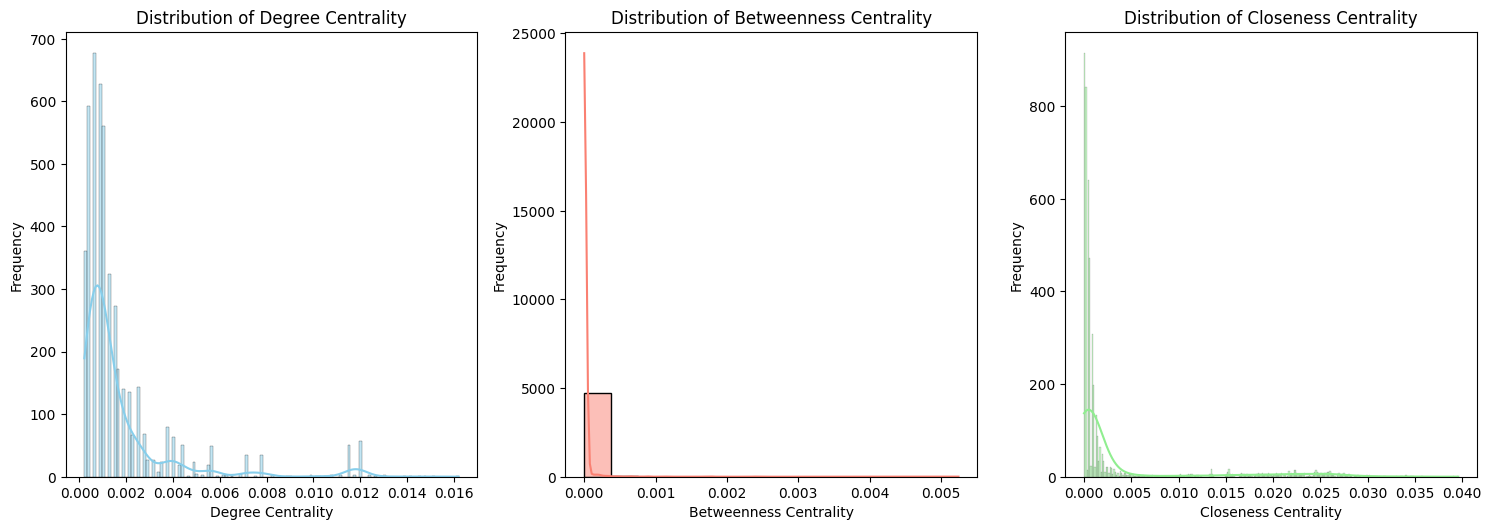

In [15]:
# Histograms for Centrality Measures
plt.figure(figsize=(15, 10))

# Degree Centrality
plt.subplot(2, 3, 1)
sns.histplot(nodes_df['Degree Centrality'], kde=True, color='skyblue')
plt.title('Distribution of Degree Centrality')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')

# Betweenness Centrality
plt.subplot(2, 3, 2)
sns.histplot(nodes_df['Betweenness Centrality'], kde=True, color='salmon')
plt.title('Distribution of Betweenness Centrality')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')

# Closeness Centrality
plt.subplot(2, 3, 3)
sns.histplot(nodes_df['Closeness Centrality'], kde=True, color='lightgreen')
plt.title('Distribution of Closeness Centrality')
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()


The histograms for the centrality measures (Degree Centrality, Betweenness Centrality, and Closeness Centrality) provide a visual representation of the distribution of these measures within the academic network. The observed pattern of peaking at the start and gradually decreasing suggests interesting characteristics about the structure and connectivity of the network.

***Degree Centrality:***
Interpretation: The histogram for Degree Centrality indicates that a substantial number of nodes (authors or entities) in the network have a relatively high degree of connections. This implies the presence of a core group of highly collaborative authors who are actively engaged with numerous co-authors or collaborators. The gradual decrease suggests that as the degree of centrality decreases, the number of nodes with fewer connections increases.

***Betweenness Centrality:***
Interpretation: The histogram for Betweenness Centrality reveals that there is a significant presence of nodes acting as bridges or intermediaries between different clusters or subgroups within the network. The initial peak indicates the core nodes with high betweenness, facilitating connections between disparate parts of the network. The gradual decline suggests that as betweenness decreases, the number of nodes serving as crucial bridges diminishes.

***Closeness Centrality:***
Interpretation: The Closeness Centrality histogram reflects the efficiency of information flow within the network. The initial peak suggests a group of nodes with high closeness, meaning they are closely connected to others. As the centrality decreases, the histogram shows an increasing number of nodes with less efficient information flow. This may indicate the presence of authors who, while still connected, are not as closely linked to the overall network.

***Summary:***
In summary, the observed patterns in the histograms suggest a structured and interconnected academic network. The initial peaks highlight the presence of highly collaborative and central nodes, while the gradual decrease indicates a broader distribution of nodes with varying degrees, betweenness, and closeness centrality. Understanding these centrality distributions provides valuable insights into the collaborative dynamics and information flow within the academic network.

In [13]:
# Sort the DataFrame by 'Degree Centrality' in descending order
sorted_df = nodes_df.sort_values(by='Degree Centrality', ascending=False)

sorted_df.head()

,Author,Degree Centrality,Betweenness Centrality,Closeness Centrality,PageRank
4605,Wang Y.,0.016207,0.004802,0.039069,0.001817
4684,Wang Z.,0.015155,0.002790,0.033688,0.000666
892,Zhu Y.,0.014734,0.003699,0.031342,0.000753
490,Lee J.H.,0.014523,0.000029,0.006317,0.000205
3120,Osborn K.,0.014102,0.000013,0.007998,0.000247


## Topic Modeling and Visualization of Academic Publications

Perform topic modeling on academic publications by combining index keywords and abstracts. Using Latent Dirichlet Allocation (LDA), it identifies latent topics within the corpus and displays the top keywords for each topic. The distribution of topics across the documents is then visualized, providing insights into the prevalent themes and subjects covered in the academic publications. Adjust the **'num_topics'** parameter to control the number of identified topics based on your dataset.

Topic #1: learning, machine, algorithms, model, ml, classification, models, 2023, using, systems
Topic #2: health, medical, human, clinical, research, study, segmentation, care, disease, covid
Topic #3: learning, network, neural, networks, systems, deep, methods, analysis, machine, based
Topic #4: research, ai, students, education, big, management, technology, 2023, knowledge, development
Topic #5: analysis, model, based, methods, models, time, method, performance, proposed, feature

Topic Distribution:
Topic
3    0.302345
4    0.222781
0    0.186767
2    0.154941
1    0.133166
Name: proportion, dtype: float64


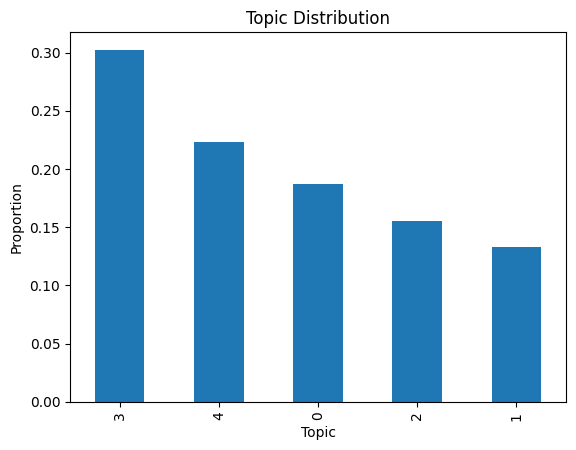

In [12]:
df['Combined_Text'] = df['Index Keywords'].astype(str) + ' ' + df['Abstract'].astype(str)

# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english', max_df=0.8, max_features=1000)
X = vectorizer.fit_transform(df['Combined_Text'])

# Apply Latent Dirichlet Allocation (LDA) for topic modeling
num_topics = 5  # You can adjust the number of topics based on your dataset
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Display the top words for each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_keywords_idx = topic.argsort()[:-10 - 1:-1]
    top_keywords = [feature_names[i] for i in top_keywords_idx]
    print(f"Topic #{topic_idx + 1}: {', '.join(top_keywords)}")

# Assign each document to its most probable topic
df['Topic'] = lda.transform(X).argmax(axis=1)

# Display the distribution of topics
topic_distribution = df['Topic'].value_counts(normalize=True)
print("\nTopic Distribution:")
print(topic_distribution)

# Visualize the distribution of topics
topic_distribution.plot(kind='bar', xlabel='Topic', ylabel='Proportion', title='Topic Distribution')
plt.show()

The topics generated by the Latent Dirichlet Allocation (LDA) model are displayed nicely. Based on the top keywords for each topic, here's a brief interpretation:

**Topic 1:** ***Machine Learning Algorithms***
Keywords: learning, machine, algorithms, model, ml, classification, models, 2023, using, systems

**Topic 2:** ***Health and Medical Research***
Keywords: health, medical, human, clinical, research, study, segmentation, care, disease, covid

**Topic 3**: ***Deep Learning and Neural Networks***
Keywords: learning, network, neural, networks, systems, deep, methods, analysis, machine, based

**Topic 4:** ***Research and Education in AI***
Keywords: research, ai, students, education, big, management, technology, 2023, knowledge, development

**Topic#5:** ***Analysis and Modeling Methods***
Keywords: analysis, model, based, methods, models, time, method, performance, proposed, feature

These topics provide a high-level overview of the themes present in your dataset. You can use this information to gain insights into the primary areas of research covered in the academic collaboration network.

## Visualization


#### After loading the data into the nodes and csv files for both Authors and Countries we imported the data and visualised it in ***"Gephi"*** which is a powerful tool for visualising big netwroks as we couldn't visualise them properly using matplotlib and networkx
#### Here is the result :

### Countries community detection (Using Louvain Algorithm)

<img src = './Photos/1.jpg' width="width" height="height" style="width:1200px;height:600px;"/>

### Authors community detection (Using Louvain Algorithm)

<img src = './Photos/2.jpg' width="width" height="height" style="width:1200px;height:600px;"/>

### Zoomed-in Authors community detection

<img src = './Photos/3.jpg' width="width" height="height" style="width:1200px;height:600px;"/>

## Conclusion

In conclusion, our analysis of Scopus data retrieved through a targeted query ("Data Science" in TITLE-ABS and PUBYEAR > 2022) has provided a nuanced understanding of the contemporary landscape in data science research. The centrality measures underscore the pivotal roles played by the United States, United Kingdom, France, China, and Spain in fostering global collaboration and knowledge dissemination within the field.

Notable authors, including Wang Y., Wang Z., Zhu Y., Lee J.H., and Osborn K., emerge as influential figures, reflecting their significant contributions to the discourse and advancement of data science. Their centrality within the academic network indicates active engagement in collaborative initiatives, potentially offering valuable insights for future research partnerships.

The identified thematic areas through topic modeling showcase the multifaceted nature of recent data science publications. The prevalence of topics such as machine learning algorithms, health and medical research, neural networks, deep learning, AI in education, and data analysis methods highlights the diverse range of research endeavors shaping the current data science landscape.

These findings hold implications for researchers, policymakers, and practitioners in the field, providing actionable insights for international collaboration, identifying key contributors, and staying abreast of emerging trends. As we navigate the dynamic landscape of data science, this study contributes to the ongoing dialogue, offering a comprehensive snapshot of the field's current state and potential future directions.